In [1]:
# Importing necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from imblearn.combine import SMOTEENN


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split



# Evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


from sklearn.preprocessing import LabelEncoder

# To ignore/disable warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# importing Data

data = pd.read_csv("CVD_cleaned.csv")
data

General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No         No   
2               No           No         No   
3               No           No         No   
4               No           No         No   
...            ...          ...        ...   
308849          No           No         No   
308850          No           No         No   
308851          No           No        Yes   
308852          No           No         No   
308853          No           No         No   

                                          Diabetes Arthritis     Sex  \
0                                               No       Yes  Female   
1                                              Yes        No  Female   
2                                              Yes        No  Female   
3                                              Yes        No    Male   
4                                               No        No    Male   
...                                            ...       ...     ...   
308849                                          No        No    Male   
308850                                         Yes        No    Male   
308851  Yes, but female told only during pregnancy        No  Female   
308852                                          No        No    Male   
308853                                          No        No  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0             70-74          150        32.66  14.54             Yes   
1             70-74          165        77.11  28.29              No   
2             60-64          163        88.45  33.47              No   
3             75-79          180        93.44  28.73              No   
4               80+          191        88.45  24.37             Yes   
...             ...          ...          ...    ...             ...   
308849        25-29          168        81.65  29.05              No   
308850        65-69          180        69.85  21.48              No   
308851        30-34          157        61.23  24.69             Yes   
308852        65-69          183        79.38  23.73              No   
308853        45-49          160        81.19  31.71              No   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                         0                 30                            16   
1                         0                 30                             0   
2                         4                 12                             3   
3                         0                 30                            30   
4                         0                  8                             4   
...                     ...                ...                           ...   
308849                    4                 30                             8   
308850                    8                 15                            60   
308851                    4                 40                             8   
308852                    3                 30 

In [3]:
data.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0          150        32.66  14.54             Yes                    0   
1          165        77.11  28.29              No                    0   
2          163        88.45  33.47              No                    4   
3          180        93.44  28.73              No                    0   
4          191        88.45  24.37             Yes                    0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0                 30                            16                       12  
1                 30                             0                        4  
2                 12                             3                       16  
3                 30                            30                        8  
4                  8                             4                        0

In [4]:
data.tail()

General_Health                  Checkup Exercise Heart_Disease  \
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
308849          No           No         No   
308850          No           No         No   
308851          No           No        Yes   
308852          No           No         No   
308853          No           No         No   

                                          Diabetes Arthritis     Sex  \
308849                                          No        No    Male   
308850                                         Yes        No    Male   
308851  Yes, but female told only during pregnancy        No  Female   
308852                                          No        No    Male   
308853                                          No        No  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
308849        25-29          168        81.65  29.05              No   
308850        65-69          180        69.85  21.48              No   
308851        30-34          157        61.23  24.69             Yes   
308852        65-69          183        79.38  23.73              No   
308853        45-49          160        81.19  31.71              No   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
308849                    4                 30                             8   
308850                    8                 15                            60   
308851                    4                 40                             8   
308852                    3                 30                            12   
308853                    1                  5                            12   

        FriedPotato_Consumption  
308849                        0  
308850                        4  
308851                        4  
308852                        0  
308853                        1

In [5]:
# To get the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [6]:
# To get the descriptive statistics of the data

data.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [7]:
# get the descriptive stat of the categorical variable (Object)

data.describe(include="object")

General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       308854       308854     308854   308854    308854  308854   
unique           2            2          2        4         2       2   
top             No           No         No       No        No  Female   
freq        278860       278976     246953   259141    207783  160196   

       Age_Category Smoking_History  
count        308854          308854  
unique           13               2  
top           65-69              No  
freq          33434          183590

### Data Cleaning


#### Remove parenthesis from column names

In [8]:
# Remove parentheses from all column names
data.columns = data.columns.str.replace(r'[()]', '', regex=True)

In [9]:
# To check where "SKIN CANCER" IS YES

skin_cancer = data[data["Skin_Cancer"]=="Yes"]
skin_cancer

General_Health               Checkup Exercise Heart_Disease  \
11               Fair  Within the past year       No           Yes   
13               Fair  Within the past year       No            No   
19               Good  Within the past year       No            No   
24               Good  Within the past year       No            No   
32               Fair  Within the past year      Yes            No   
...               ...                   ...      ...           ...   
308770           Good  Within the past year      Yes            No   
308773      Very Good  Within the past year      Yes            No   
308808           Good  Within the past year       No            No   
308834      Very Good  Within the past year      Yes            No   
308842           Good  Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
11             Yes           No         No      Yes        No    Male   
13             Yes           No         No       No        No    Male   
19             Yes          Yes         No      Yes       Yes  Female   
24             Yes          Yes         No       No       Yes  Female   
32             Yes           No         No       No       Yes    Male   
...            ...          ...        ...      ...       ...     ...   
308770         Yes          Yes         No       No        No    Male   
308773         Yes           No         No       No        No  Female   
308808         Yes           No         No       No        No  Female   
308834         Yes           No         No       No        No    Male   
308842         Yes          Yes         No       No        No  Female   

       Age_Category  Height_cm  Weight_kg    BMI Smoking_History  \
11            75-79        175      73.48  23.92              No   
13            65-69        178     113.40  35.87             Yes   
19            70-74        163      79.38  30.04              No   
24              80+        160      70.31  27.46             Yes   
32            70-74        188     102.06  28.89              No   
...             ...        ...        ...    ...             ...   
308770        65-69        188      83.91  23.75              No   
308773        45-49        163      74.39  28.15             Yes   
308808        70-74        157      81.65  32.92              No   
308834        50-54        180      90.72  27.89             Yes   
308842        45-49        163      74.39  28.15             Yes   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
11                        0                  2                             8   
13                        4                  2                             3   
19                        0                 12                             8   
24                       12                  8                            16   
32                        0                 30                             1   
...                     ...                ...                           ...   
308770                   10                 20                            30   
308773                   24                  0                            30   
308808                    0                 12                            30   
308834                    6                 30                            30   
308842                   30                  0                            30   

        FriedPotato_Consumption  
11                           30  
13                            4  
19                            4  
24                            4  
32                           12  
...                         ...  
308770                        0  
308773                        0  
308808                        0  
308834                        0  
308842                        0  

[29994 rows x 19 columns]

In [10]:
# To see the characteristics of people with skin cancer based on the data.

skin_cancer.describe()

Height_cm     Weight_kg           BMI  Alcohol_Consumption  \
count  29994.000000  29994.000000  29994.000000         29994.000000   
mean     170.836634     81.704404     27.878076             6.165566   
std       10.392574     19.399320      5.672512             9.521321   
min       94.000000     34.020000     12.170000             0.000000   
25%      163.000000     68.040000     24.030000             0.000000   
50%      170.000000     79.380000     27.060000             1.000000   
75%      178.000000     92.080000     30.680000             8.000000   
max      218.000000    254.010000     97.580000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count       29994.000000                  29994.000000   
mean           31.664900                     15.696206   
std            24.967107                     14.001043   
min             0.000000                      0.000000   
25%            12.000000                      5.000000   
50%            30.000000                     12.000000   
75%            32.000000                     24.000000   
max           120.000000                    124.000000   

       FriedPotato_Consumption  
count             29994.000000  
mean                  5.278089  
std                   7.391486  
min                   0.000000  
25%                   1.000000  
50%                   4.000000  
75%                   8.000000  
max                 120.000000

In [11]:
# The statistics of the categorical data (object)

skin_cancer.describe(include="object")

General_Health               Checkup Exercise Heart_Disease  \
count           29994                 29994    29994         29994   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq            10734                 26490    23095         25304   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count        29994        29994      29994    29994     29994   29994   
unique           1            2          2        4         2       2   
top            Yes           No         No       No       Yes  Female   
freq         29994        23015      24459    23975     15659   15115   

       Age_Category Smoking_History  
count         29994           29994  
unique           13               2  
top             80+              No  
freq           6210           16355

In [12]:
# Check for missing value

data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_cm                       0
Weight_kg                       0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

#### To check for trailing, leading and internal extra spaces in df

In [13]:
# Initialize a flag to check if any column has extra spaces

extra_spaces_found = False

# Check for extra spaces in all columns

for col in data.columns:
    leading_trailing_spaces = data[col].astype(str).str.startswith(' ') | data[col].astype(str).str.endswith(' ')
    internal_spaces = data[col].astype(str).str.contains('  +')
    
    if leading_trailing_spaces.any() or internal_spaces.any():
        extra_spaces_found = True
        print(f"Column '{col}' has extra spaces.")
        if leading_trailing_spaces.any():
            print("Rows with leading or trailing spaces:")
            print(data[leading_trailing_spaces])
        if internal_spaces.any():
            print("Rows with internal extra spaces:")
            print(data[internal_spaces])

# Print "No extra spaces" if no columns have extra spaces
if not extra_spaces_found:
    print("No extra spaces")

No extra spaces


In [14]:
# Identify duplicates across all columns

duplicates = data[data.duplicated(keep=False)]

duplicates.value_counts().sum()

159

#### Remove duplicates

In [15]:
data = data.drop_duplicates()

In [16]:
# Confirm that Duplicates have been removed.

duplicates = data[data.duplicated(keep=False)]

duplicates.value_counts().sum()

0

In [17]:
data.shape


(308774, 19)

In [18]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  Height_cm  \
0           No         No       No       Yes  Female        70-74        150   
1           No         No      Yes        No  Female        70-74        165   

   Weight_kg    BMI Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0      32.66  14.54             Yes                    0                 30   
1      77.11  28.29              No                    0                 30   

   Green_Vegetables_Consumption  FriedPotato_Consumption  
0                            16                       12  
1                             0                        4

### EXPLORATORY DATA ANALYSIS

In [19]:
# Create a new column combining 'skin_cancer' and 'other_cancer' information

data.loc[:, 'cancer_status'] = data.apply(
    lambda row: 'Both' if row['Skin_Cancer'] == 'Yes' and row['Other_Cancer'] == 'Yes' else
                'Skin Cancer' if row['Skin_Cancer'] == 'Yes' else
                'Other Cancer' if row['Other_Cancer'] == 'Yes' else
                'No Cancer', axis=1)


In [20]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  Height_cm  \
0           No         No       No       Yes  Female        70-74        150   
1           No         No      Yes        No  Female        70-74        165   

   Weight_kg    BMI Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0      32.66  14.54             Yes                    0                 30   
1      77.11  28.29              No                    0                 30   

   Green_Vegetables_Consumption  FriedPotato_Consumption cancer_status  
0                            16                       12     No Cancer  
1                             0                        4     No Cancer

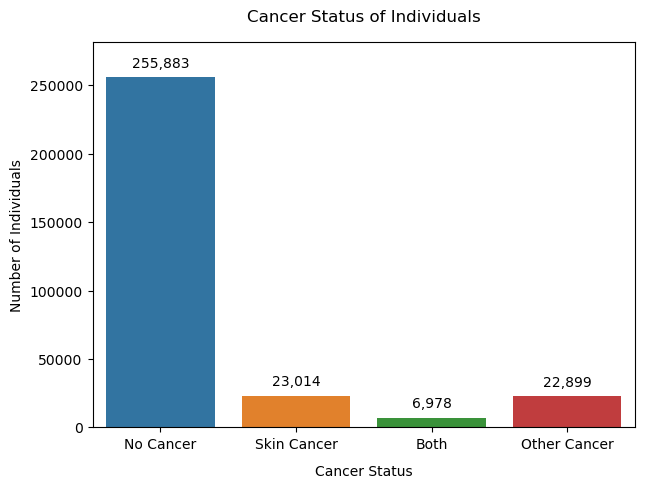

In [21]:
# Create the countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="cancer_status", data=data)
plt.xlabel("Cancer Status", labelpad=10)
plt.ylabel("Number of Individuals")
plt.title("Cancer Status of Individuals", pad=15)

# Function to format labels with commas
def formatted_label(value):
    return f'{int(value):,}'

# Add labels with commas
for p in ax.patches:
    label = formatted_label(p.get_height())
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# add more space above the highest bar
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height * 1.1)  # Add 10% more space above the highest bar

# Show plot
plt.show()

In [22]:
counts = data['cancer_status'].value_counts().reset_index()
counts.columns = ['cancer_status', 'count']

# Create a pie chart
fig = px.pie(counts, names='cancer_status', values='count', 
             color_discrete_sequence=['#BDF2D5', '#FF5D5D', '#E9D5CA', '#6D8B74'],
             title='Distribution of Cancer Status')

# hover template to show count on hover
fig.update_traces(hovertemplate='%{label}: %{value} (%{percent})', textinfo='label+percent',
                  textposition='auto')

fig.update_traces(rotation=120, pull=[0.01, 0.02, 0.03, 0.04]) 


# Show plot
fig.show()

## Create function to plot all distribution

In [23]:
def distribution_plot(data, column_name, xlabel, title):
    
    # Calculate counts and percentages
    total_count = len(data)
    counts = data[column_name].value_counts()
    percentages = counts / total_count * 100

    # Create the plot
    plt.figure(figsize=(11, 5))
    ax = sns.countplot(x=column_name, data=data, order=counts.index)
    plt.xlabel(xlabel, labelpad=20)
    plt.ylabel("Number of Individuals")
    plt.title(title, pad=15)

   # Adding more space above the highest bar for better readability
    plt.ylim(0, max(counts) * 1.2)  

    # Add number and percentage labels to the bars
    for p in ax.patches:
        count = int(p.get_height())
        percentage = count / total_count * 100
        count_label = f'{count:,}'  # Format count with commas
        percentage_label = f'{percentage:.1f}%'
        
        # Annotate percentage above the bar
        ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points')
        # Annotate count below the percentage label
        ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                    xytext=(0, -10), textcoords='offset points', color='white')

    # Show plot
    plt.show()


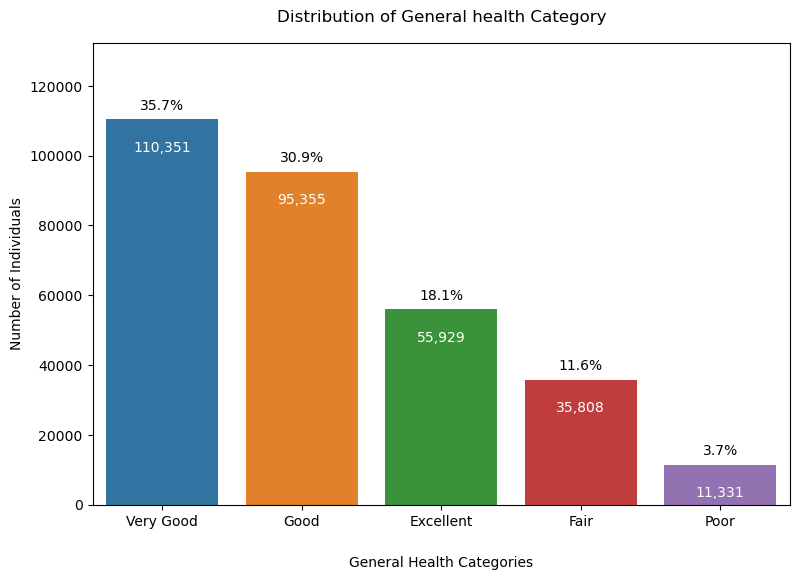

In [24]:
# Calculate counts and percentages
total_count = len(data)
counts = data['General_Health'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x="General_Health", data=data, order=counts.index)

plt.xlabel("General Health Categories", labelpad=20)
plt.ylabel("Number of Individuals")
plt.title("Distribution of General health Category", pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2) 


# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate count above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', 
                xytext=(0, 5), textcoords='offset points')
    # Annotate percentage below the count label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top', 
                xytext=(0, -15), textcoords='offset points', color= 'white')

# Show plot
plt.show()   

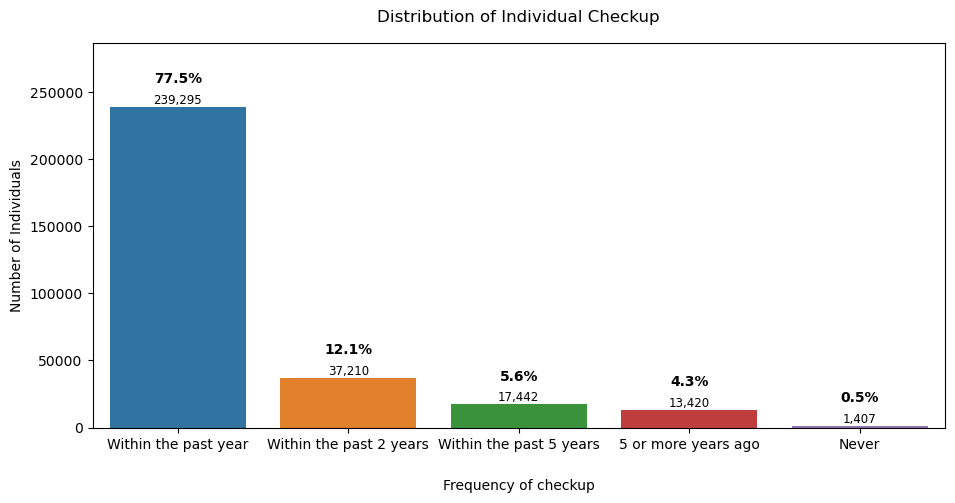

In [25]:
# Calculate counts and percentages
total_count = len(data)
counts = data['Checkup'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='Checkup', data=data, order=counts.index)
plt.xlabel('Frequency of checkup', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Distribution of Individual Checkup', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'

    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

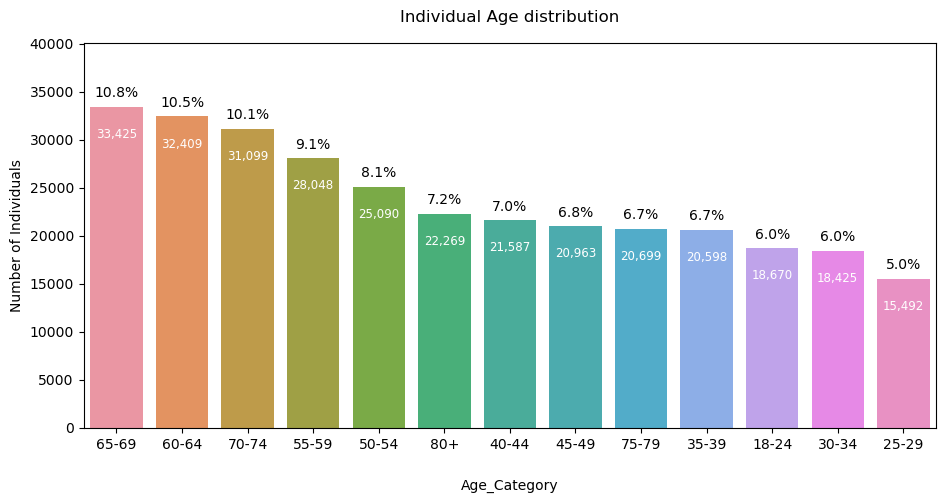

In [26]:
# Calculate counts and percentages
total_count = len(data)
counts = data['Age_Category'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='Age_Category', data=data, order=counts.index)
plt.xlabel('Age_Category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual Age distribution', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate count above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', 
                xytext=(0, 5), textcoords='offset points')
    # Annotate percentage below the count label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top', 
                xytext=(0, -15), textcoords='offset points', color= 'white', fontsize=8.5)

# Show plot
plt.show()

In [27]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  Height_cm  \
0           No         No       No       Yes  Female        70-74        150   
1           No         No      Yes        No  Female        70-74        165   

   Weight_kg    BMI Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0      32.66  14.54             Yes                    0                 30   
1      77.11  28.29              No                    0                 30   

   Green_Vegetables_Consumption  FriedPotato_Consumption cancer_status  
0                            16                       12     No Cancer  
1                             0                        4     No Cancer

In [28]:
# Data Visualization for Height Category

def Height_cat(Height_cm):
    if Height_cm <= 119:
        return "94 - 119"
    elif Height_cm <= 145:
        return "120 - 145"
    elif Height_cm <= 171:
        return "146 - 171"
    elif Height_cm <= 197:
        return "172 - 197"
    else:
        return "198 & above"
    
data["Height_cat"] = data["Height_cm"].apply(Height_cat)


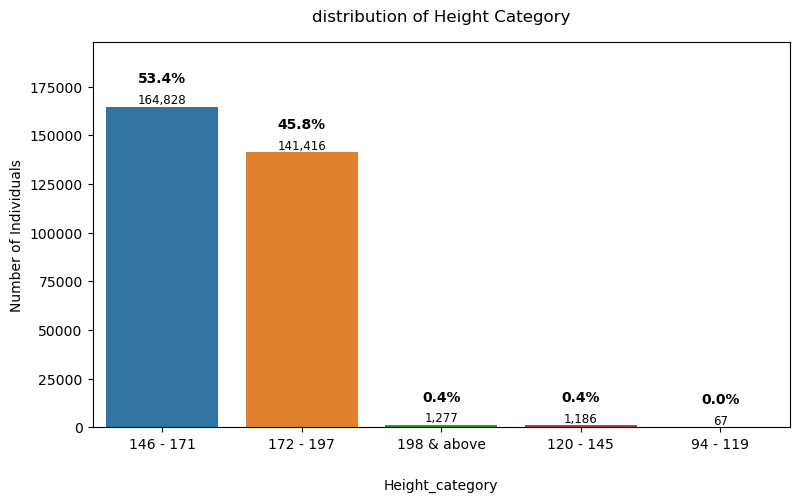

In [29]:
# Calculate counts and percentages

total_count = len(data)
counts = data['Height_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='Height_cat', data=data, order=counts.index)
plt.xlabel('Height_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of Height Category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [30]:
# Data Visualization for Weight_bracket

def Weight_cat(Weight_kg):
    if Weight_kg <= 50:
        return "Under_weight"
    elif Weight_kg <= 80:
        return "Normal_weight"
    elif Weight_kg <= 110:
        return "Over_weight"
    elif Weight_kg <= 140:
        return "Obesity"
    else:
        return "Severe_obesity"
    
data["Weight_cat"] = data["Weight_kg"].apply(Weight_cat)



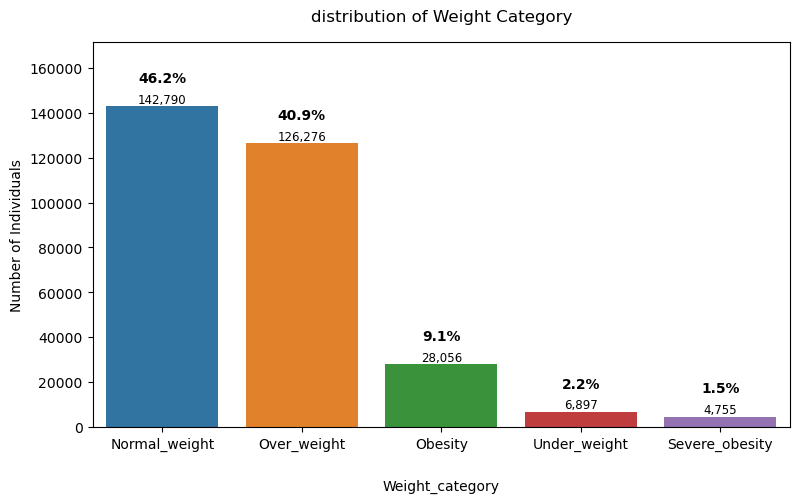

In [31]:
# Calculate counts and percentages

total_count = len(data)
counts = data['Weight_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='Weight_cat', data=data, order=counts.index)
plt.xlabel('Weight_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of Weight Category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [32]:
# Data Visualization for BMI

def BMI_Cat(BMI):
    if BMI <= 18.5:
        return "low_BMI"
    elif BMI <= 24.9:
        return "Normal_BMI"
    elif BMI <= 29.9:
        return "High_BMI"
    elif BMI <=34.9:
        return "Obes_BMI"
    else:
        return "Severe_obes_BMI"
    
data["BMI_Cat"] = data["BMI"].apply(BMI_Cat)



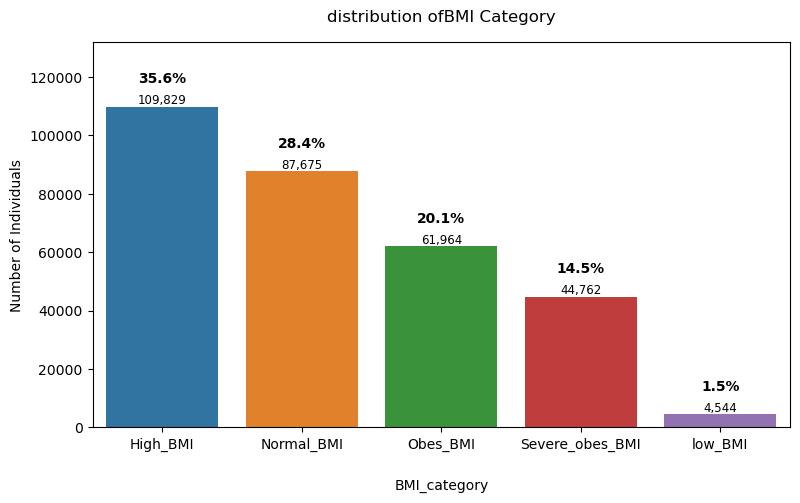

In [33]:
# Calculate counts and percentages

total_count = len(data)
counts = data['BMI_Cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='BMI_Cat', data=data, order=counts.index)
plt.xlabel('BMI_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution ofBMI Category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [34]:
# Data Visualization for Alcohol consumption

def alcohol_Cat(Alcohol_Consumption):
    if Alcohol_Consumption == 0:
        return "0"
    elif Alcohol_Consumption <= 6:
        return "1 - 6"
    elif Alcohol_Consumption <= 13:
        return "7 - 13"
    elif Alcohol_Consumption <= 19:
        return "14 - 19"
    elif Alcohol_Consumption <= 26:
        return "20 - 26"
    else:
        return "27 & Above"
    
data["alcohol_Cat"] = data["Alcohol_Consumption"].apply(alcohol_Cat)


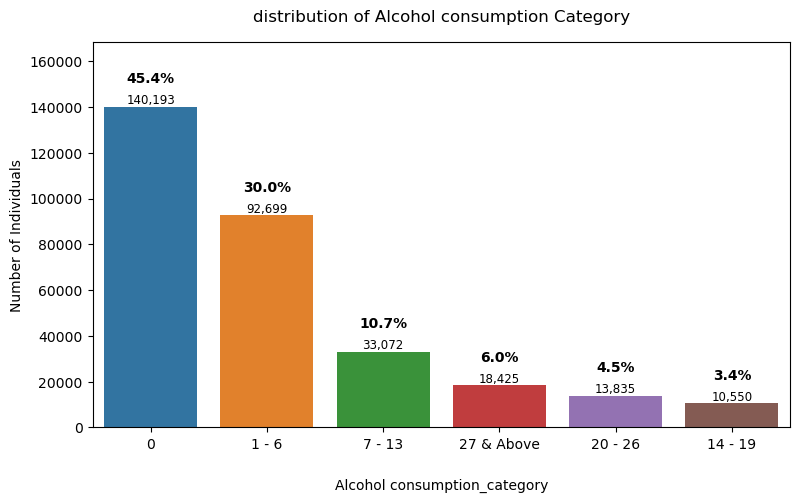

In [35]:
  # Calculate counts and percentages

total_count = len(data)
counts = data['alcohol_Cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='alcohol_Cat', data=data, order=counts.index)
plt.xlabel('Alcohol consumption_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of Alcohol consumption Category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [36]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex  ... Smoking_History  \
0           No         No       No       Yes  Female  ...             Yes   
1           No         No      Yes        No  Female  ...              No   

   Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                    0                 30                            16   
1                    0                 30                             0   

  FriedPotato_Consumption  cancer_status  Height_cat     Weight_cat   BMI_Cat  \
0                      12      No Cancer   146 - 171   Under_weight   low_BMI   
1                       4      No Cancer   146 - 171  Normal_weight  High_BMI   

  alcohol_Cat  
0           0  
1           0  

[2 rows x 24 columns]

In [37]:
# Data Visualization for Fruit_consumption Category

def Fruit_Consumption_cat(Fruit_Consumption):
    if Fruit_Consumption == 0:
        return "0"
    elif Fruit_Consumption <= 24:
        return "1 - 24"
    elif Fruit_Consumption <= 49:
        return "25 - 49"
    elif Fruit_Consumption <= 74:
        return "50 - 74"
    elif Fruit_Consumption <= 99:
        return "75 - 99"
    else:
        return "100 & Above"
    
data["Fruit_Consumption_cat"] = data["Fruit_Consumption"].apply(Fruit_Consumption_cat)



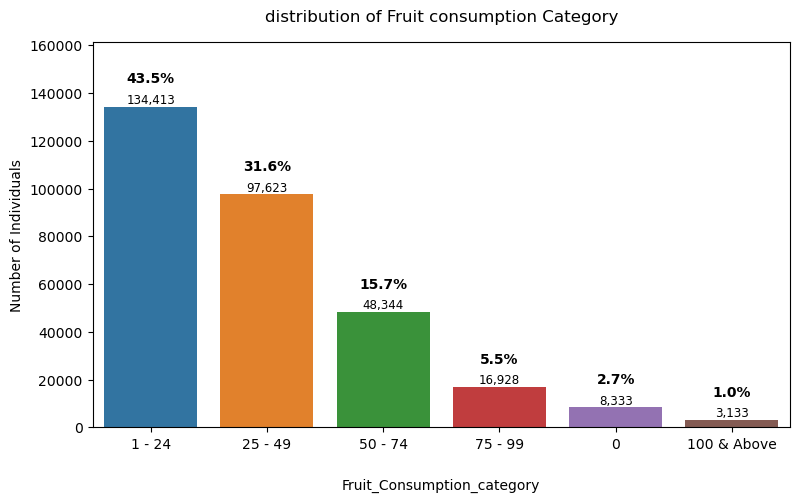

In [38]:
  # Calculate counts and percentages

total_count = len(data)
counts = data['Fruit_Consumption_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='Fruit_Consumption_cat', data=data, order=counts.index)
plt.xlabel('Fruit_Consumption_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of Fruit consumption Category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [39]:
# Data Visualization for Green_Vegetables_Consumption Category

def Green_veg_Consumption_cat(Green_Vegetables_Consumption):
    if Green_Vegetables_Consumption == 0:
        return "0"
    elif Green_Vegetables_Consumption <=25:
        return "1 - 25"
    elif Green_Vegetables_Consumption <= 51:
        return "26 - 51"
    elif Green_Vegetables_Consumption <= 77:
        return "52 - 77"
    elif Green_Vegetables_Consumption <= 103:
        return "78 - 103"
    else:
        return "104 & Above"
    
data["Green_veg_Consumption_cat"] = data["Green_Vegetables_Consumption"].apply(Green_veg_Consumption_cat)



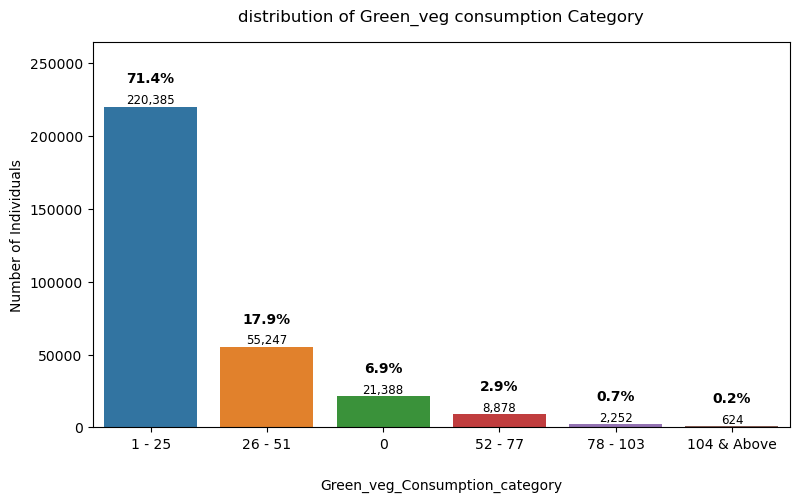

In [40]:
# Calculate counts and percentages

total_count = len(data)
counts = data['Green_veg_Consumption_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='Green_veg_Consumption_cat', data=data, order=counts.index)
plt.xlabel('Green_veg_Consumption_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of Green_veg consumption Category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [41]:
# Data Visualization for FriedPotato_Consumption Category

def FriedPotato_Consumption_cat(FriedPotato_Consumption):
    if FriedPotato_Consumption == 0:
        return "0"
    elif FriedPotato_Consumption <=24:
        return "1 - 24"
    elif FriedPotato_Consumption <= 49:
        return "25 - 49"
    elif FriedPotato_Consumption <= 74:
        return "50 - 74"
    elif FriedPotato_Consumption <= 99:
        return "75 - 99"
    else:
        return "100 & Above"
    
data["FriedPotato_Consumption_cat"] = data["FriedPotato_Consumption"].apply(FriedPotato_Consumption_cat)



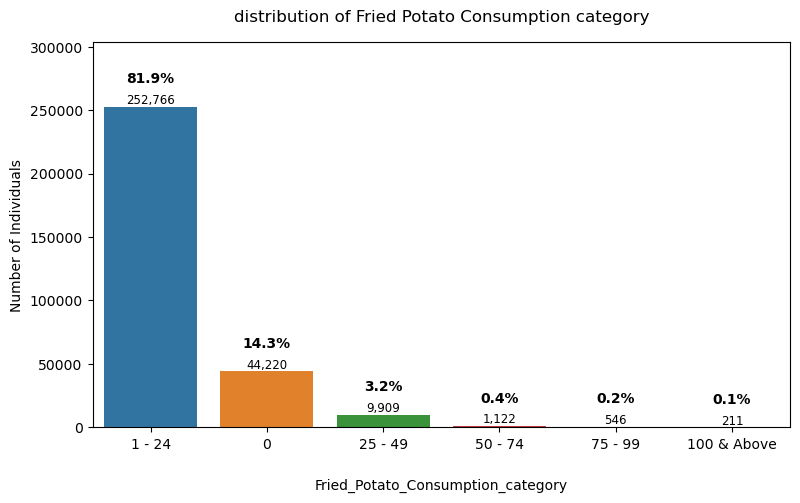

In [42]:
# Calculate counts and percentages

total_count = len(data)
counts = data['FriedPotato_Consumption_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='FriedPotato_Consumption_cat', data=data, order=counts.index)
plt.xlabel('Fried_Potato_Consumption_category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of Fried Potato Consumption category', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

### Bivariate Analysis

In [43]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex  ...  \
0           No         No       No       Yes  Female  ...   
1           No         No      Yes        No  Female  ...   

  Green_Vegetables_Consumption  FriedPotato_Consumption  cancer_status  \
0                           16                       12      No Cancer   
1                            0                        4      No Cancer   

   Height_cat     Weight_cat   BMI_Cat  alcohol_Cat  Fruit_Consumption_cat  \
0   146 - 171   Under_weight   low_BMI            0                25 - 49   
1   146 - 171  Normal_weight  High_BMI            0                25 - 49   

   Green_veg_Consumption_cat FriedPotato_Consumption_cat  
0                     1 - 25                      1 - 24  
1                          0                      1 - 24  

[2 rows x 27 columns]

In [44]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_cm', 'Weight_kg', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'cancer_status', 'Height_cat', 'Weight_cat', 'BMI_Cat', 'alcohol_Cat',
       'Fruit_Consumption_cat', 'Green_veg_Consumption_cat',
       'FriedPotato_Consumption_cat'],
      dtype='object')

### Creating a function to calculate percentage distribution across individual category

In [45]:
def percentage_distribution(data, group_by_col, target_col, target_value):
    
    
    counts = data.groupby([group_by_col, target_col]).size().unstack(fill_value=0)

    # Calculate total counts for each group_by_col category
    total_counts = counts.sum(axis=1)

    # Calculate percentages for each target_col category within each group_by_col category
    percentages = counts.div(total_counts, axis=0) * 100

    # Sort the percentages DataFrame based on the specific target_value
    if target_value in percentages.columns:
        percentages = percentages.sort_values(by=target_value)
    
    percentages_styled = percentages.style.format("{:.1f}%")
    
    return percentages_styled


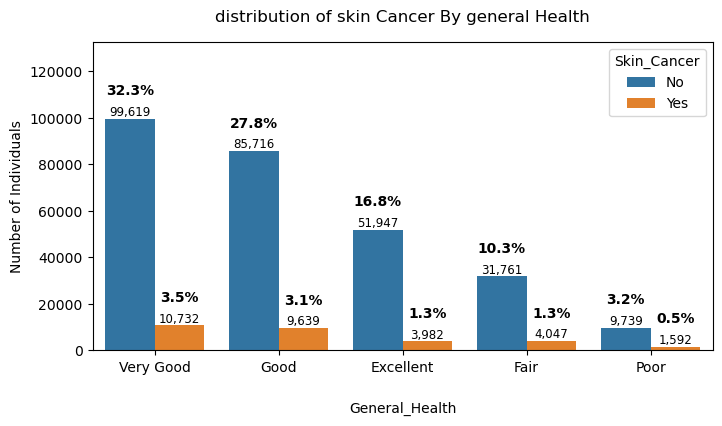

In [46]:
# Calculate counts and percentages

total_count = len(data)
counts = data['General_Health'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='General_Health', data=data, hue='Skin_Cancer', order=counts.index)
plt.xlabel('General_Health', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('distribution of skin Cancer By general Health', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
    # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', weight='bold')
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

#### Percentage distribution of Skin Cancer across individual General Health Category

In [47]:
percentage_distribution(data, 'General_Health', 'Skin_Cancer', 'Yes')

### This shows that :

--- The percentage of Skin Cancer increases as the General Health status decreases, suggesting that General Health status is significant to skin cancer.

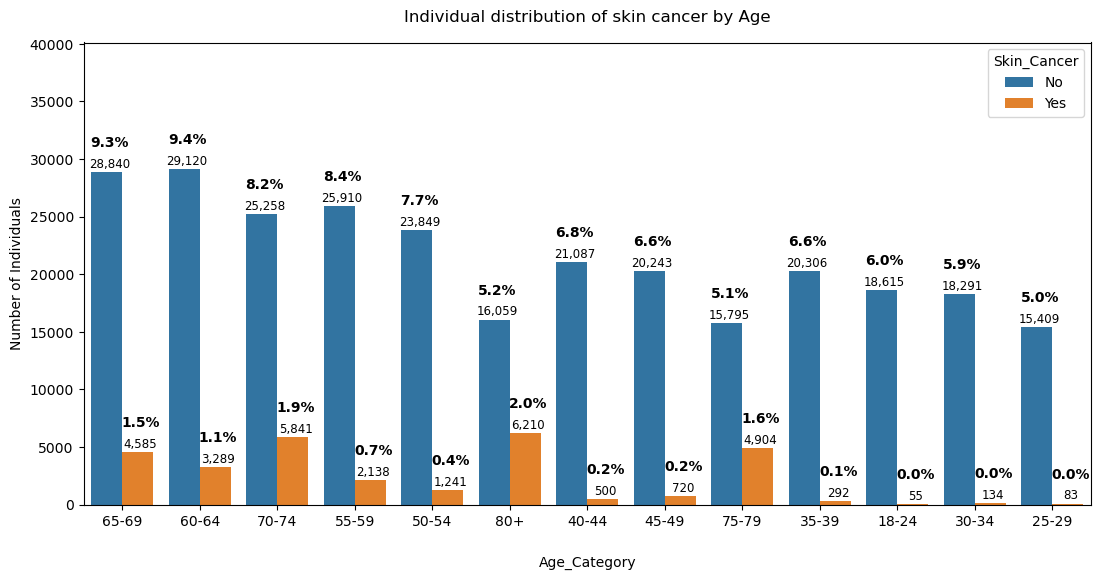

In [48]:
# Calculate counts and percentages
total_count = len(data)
counts = data['Age_Category'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(13, 6))
ax = sns.countplot(x='Age_Category', hue='Skin_Cancer', data=data, order=counts.index)
plt.xlabel('Age_Category', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual distribution of skin cancer by Age', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
   # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 16), textcoords='offset points', weight='bold', fontsize=10)
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 1), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [49]:
percentage_distribution(data, 'Age_Category', 'Skin_Cancer', 'Yes')

#### Interpretation: 
 
 The percentage of skin cancer increased with age, this shows that age appears to be significant to skin cancer.

 The plot shows that skin cancer is more prevalent among individuals from 60 years and above

### Percentage distribution of checkup by skin cancer

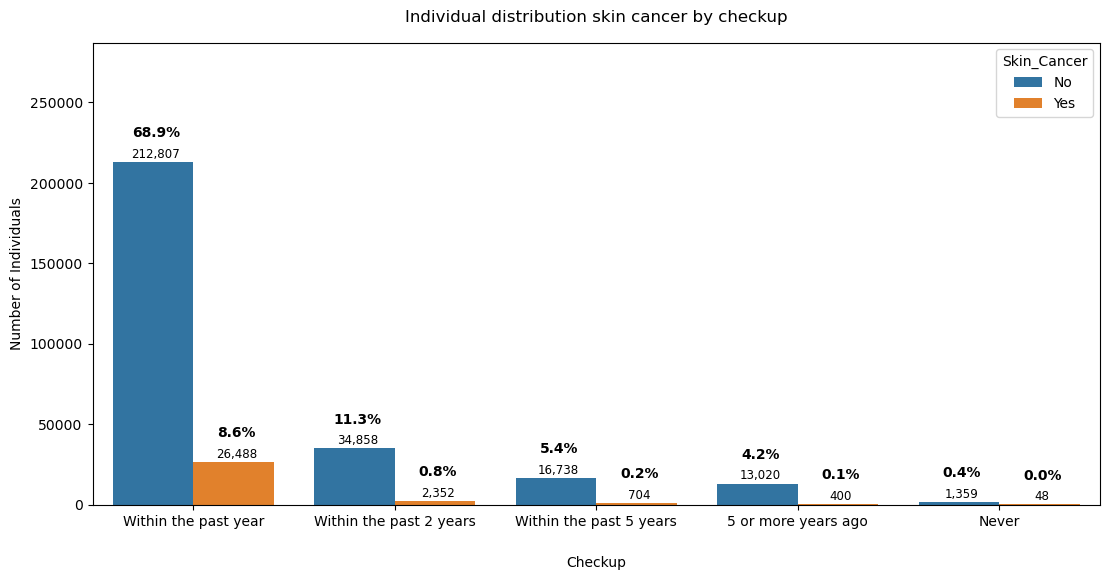

In [50]:
# Calculate counts and percentages
total_count = len(data)
counts = data['Checkup'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(13, 6))
ax = sns.countplot(x='Checkup', hue='Skin_Cancer', data=data, order=counts.index)
plt.xlabel('Checkup', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual distribution skin cancer by checkup', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
   # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 16), textcoords='offset points', weight='bold', fontsize=10)
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 1), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [51]:
percentage_distribution(data, 'Checkup', 'Skin_Cancer', 'Yes')

### Interpretation..

Although it is observed that the percentage of skin cancer increased among individuals that had a checkup within the past 

year, check up can not be said to be siginificant to skin cancer considering other categories of check up

In [52]:
percentage_distribution(data, 'General_Health', 'BMI_Cat', 'High_BMI')

 Most individuals with Normal BMI have Excellent general health, while most with severe_obes_BMI have poor general health.  This demonstrates that BMI may be significant to general health.


In [53]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex  ...  \
0           No         No       No       Yes  Female  ...   
1           No         No      Yes        No  Female  ...   

  Green_Vegetables_Consumption  FriedPotato_Consumption  cancer_status  \
0                           16                       12      No Cancer   
1                            0                        4      No Cancer   

   Height_cat     Weight_cat   BMI_Cat  alcohol_Cat  Fruit_Consumption_cat  \
0   146 - 171   Under_weight   low_BMI            0                25 - 49   
1   146 - 171  Normal_weight  High_BMI            0                25 - 49   

   Green_veg_Consumption_cat FriedPotato_Consumption_cat  
0                     1 - 25                      1 - 24  
1                          0                      1 - 24  

[2 rows x 27 columns]

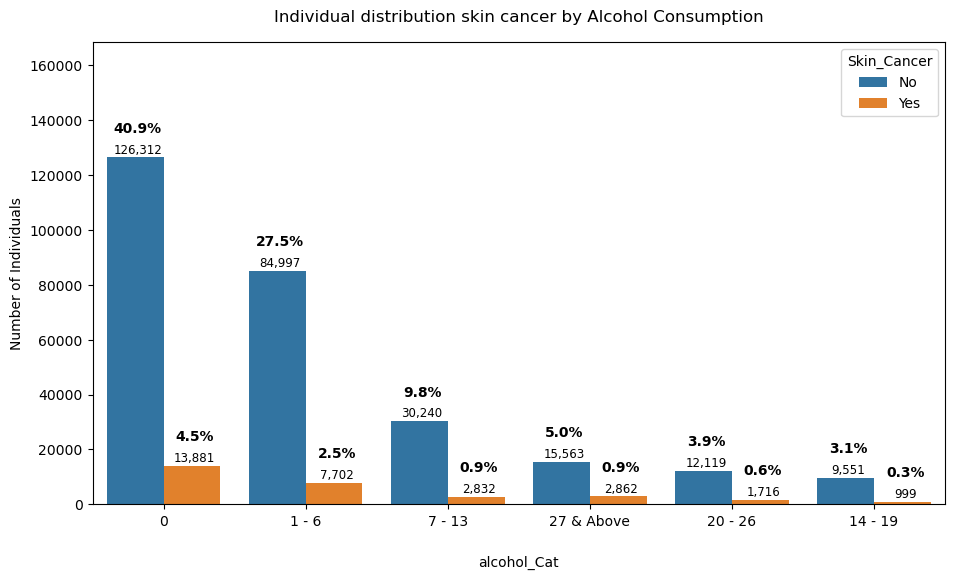

In [54]:
# Calculate counts and percentages
total_count = len(data)
counts = data['alcohol_Cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(11, 6))
ax = sns.countplot(x='alcohol_Cat', hue='Skin_Cancer', data=data, order=counts.index)
plt.xlabel('alcohol_Cat', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual distribution skin cancer by Alcohol Consumption', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
   # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 16), textcoords='offset points', weight='bold', fontsize=10)
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 1), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [55]:
percentage_distribution(data, 'alcohol_Cat', 'Skin_Cancer', 'Yes')

 There is a slight increase in the percentage of skin cancer as the individuals consumed more alcohol, however, it is also 
 
 observed that individauls who don't drink at all had a slightly more skin Cancer cases than some who who do. Further 
 
 analysis is required to test the significance of Alcohol.

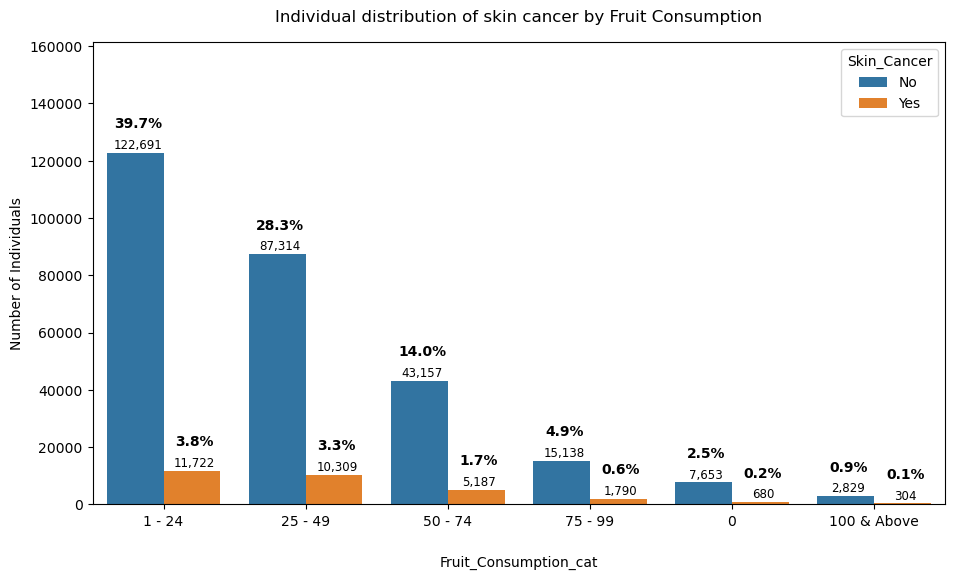

In [56]:
# Calculate counts and percentages
total_count = len(data)
counts = data['Fruit_Consumption_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(11, 6))
ax = sns.countplot(x='Fruit_Consumption_cat', hue='Skin_Cancer', data=data, order=counts.index)
plt.xlabel('Fruit_Consumption_cat', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual distribution of skin cancer by Fruit Consumption', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
   # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 16), textcoords='offset points', weight='bold', fontsize=10)
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 1), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [57]:
percentage_distribution(data, 'Fruit_Consumption_cat', 'Skin_Cancer', 'Yes')

Skin Cancer did not significantly increase or decreased as individuals consumed more or less fruits. Hence, fruit 

consumption seem less significant to skin cancer.

In [58]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_cm', 'Weight_kg', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'cancer_status', 'Height_cat', 'Weight_cat', 'BMI_Cat', 'alcohol_Cat',
       'Fruit_Consumption_cat', 'Green_veg_Consumption_cat',
       'FriedPotato_Consumption_cat'],
      dtype='object')

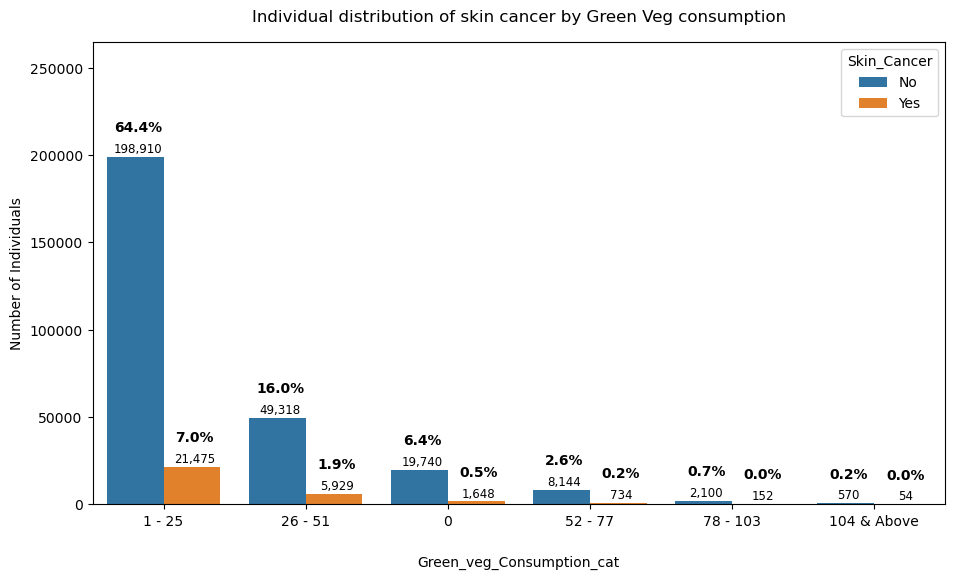

In [59]:
# Calculate counts and percentages
total_count = len(data)
counts = data['Green_veg_Consumption_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(11, 6))
ax = sns.countplot(x='Green_veg_Consumption_cat', hue='Skin_Cancer', data=data, order=counts.index)
plt.xlabel('Green_veg_Consumption_cat', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual distribution of skin cancer by Green Veg consumption', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
   # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 16), textcoords='offset points', weight='bold', fontsize=10)
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 1), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [60]:
percentage_distribution(data, 'Green_veg_Consumption_cat', 'Skin_Cancer', 'Yes')

There is no significant diference among individuals that consumed more or less green Vegetables, Hence;

Green Vegetable consumption does not appear to be signinificant to Skin Cancer.

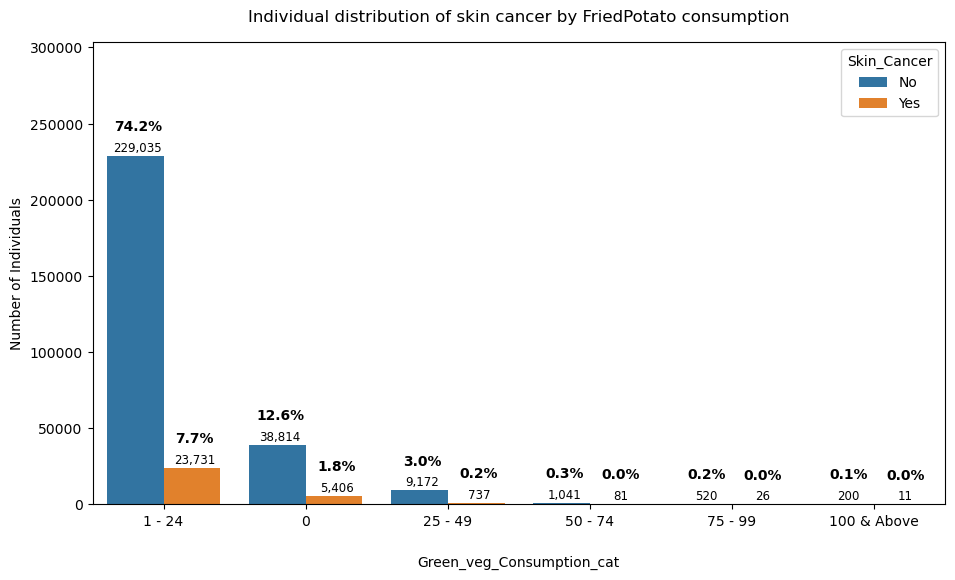

In [61]:
#Calculate counts and percentages
total_count = len(data)
counts = data['FriedPotato_Consumption_cat'].value_counts()
percentages = counts / total_count * 100

# Create the plot
plt.figure(figsize=(11, 6))
ax = sns.countplot(x='FriedPotato_Consumption_cat', hue='Skin_Cancer', data=data, order=counts.index)
plt.xlabel('Green_veg_Consumption_cat', labelpad=20)
plt.ylabel("Number of Individuals")
plt.title('Individual distribution of skin cancer by FriedPotato consumption', pad=15)

# Adding more space above the highest bar for better readability
plt.ylim(0, max(counts) * 1.2)  

# Add number and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percentage = count / total_count * 100
    count_label = f'{count:,}'  # Format count with commas
    percentage_label = f'{percentage:.1f}%'
   # Annotate percentage directly above the bar
    ax.annotate(percentage_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 16), textcoords='offset points', weight='bold', fontsize=10)
    # Annotate count directly under the percentage label
    ax.annotate(count_label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(2, 1), textcoords='offset points', fontsize=8.5)

# Show plot
plt.show()

In [62]:
percentage_distribution(data, 'FriedPotato_Consumption_cat', 'Skin_Cancer', 'Yes')

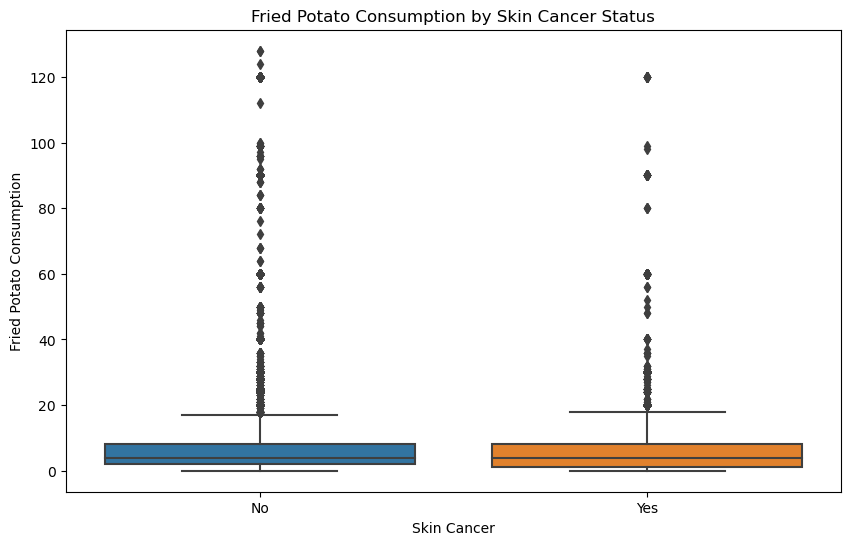

In [63]:
# Plot the distribution of fried potato consumption across skin cancer categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Skin_Cancer', y='FriedPotato_Consumption', data=data)
plt.title('Fried Potato Consumption by Skin Cancer Status')
plt.xlabel('Skin Cancer')
plt.ylabel('Fried Potato Consumption')
plt.show()

In [64]:
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(data['FriedPotato_Consumption'], data['Skin_Cancer'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"P-value: {p}")

Chi2: 973.480214378353
P-value: 2.421016373803172e-160


In [65]:
contingency_table = pd.crosstab(data['FriedPotato_Consumption'], data['Skin_Cancer'])
print(contingency_table)

Skin_Cancer                 No   Yes
FriedPotato_Consumption             
0                        38814  5406
1                        26474  3398
2                        32113  3974
3                        13832  1515
4                        61351  6440
...                        ...   ...
100                          2     0
112                          1     0
120                        194    11
124                          1     0
128                          2     0

[69 rows x 2 columns]


In [66]:
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.05614915212149579


#### Conclusion
With a Cramér's V of 0.056, the association between fried potato consumption and skin cancer is very weak.

#### Summary
Statistical Significance: The chi-square test indicated a statistically significant association between fried potato consumption and skin cancer.
Strength of Association: Despite this significance, the strength of the association, as measured by Cramér's V, is very weak (0.056).

#### Implications

The result suggests that, while there is a statistically significant association between fried potato consumption and skin cancer, the effect size is very small. This means that fried potato consumption has a minimal practical impact on skin cancer risk within.

### Save cleaned Data

## Multivariate Analysis

In [67]:
data.head(2)

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   

  Other_Cancer Depression Diabetes Arthritis     Sex  ...  \
0           No         No       No       Yes  Female  ...   
1           No         No      Yes        No  Female  ...   

  Green_Vegetables_Consumption  FriedPotato_Consumption  cancer_status  \
0                           16                       12      No Cancer   
1                            0                        4      No Cancer   

   Height_cat     Weight_cat   BMI_Cat  alcohol_Cat  Fruit_Consumption_cat  \
0   146 - 171   Under_weight   low_BMI            0                25 - 49   
1   146 - 171  Normal_weight  High_BMI            0                25 - 49   

   Green_veg_Consumption_cat FriedPotato_Consumption_cat  
0                     1 - 25                      1 - 24  
1                          0                      1 - 24  

[2 rows x 27 columns]

### Encoding

##### Handling the Ordinal Categorical Features  

In [68]:
# make copy of dataFram
df_copy = data.copy()

In [69]:
# mapping ranks to General Health.

df_copy.General_Health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [70]:
size_map = { 'Poor': 0, 'Fair': 1, 'Good': 2,
            'Very Good': 3, 'Excellent': 4 }

df_copy['General_Health'] = df_copy['General_Health'].map(size_map )

In [71]:
# mapping ranks to Checkup.

df_copy.Checkup.unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [72]:
size_map = { 'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2,
            'Within the past 2 years': 3, 'Within the past year':4 }

df_copy['Checkup'] = df_copy['Checkup'].map(size_map )

In [73]:
# mapping ranks to Age Category.

df_copy.Age_Category.unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [74]:
size_map = { '18-24': 0, '25-29': 1, '30-34': 2,
            '35-39': 3, '40-44':4, '45-49': 5, '50-54': 6, '55-59':7, '60-64': 8, '65-69': 9,
           '70-74': 10, '75-79': 11, '80+': 12}

df_copy['Age_Category'] = df_copy['Age_Category'].map(size_map )

In [75]:
# mapping ranks to Height Category.

df_copy.Height_cat.unique()

array(['146 - 171', '172 - 197', '198 & above', '120 - 145', '94 - 119'],
      dtype=object)

In [76]:
size_map = {'94 - 119': 0, '120 - 145': 1, '146 - 171':2, '172 - 197': 3, '198 & above': 4 }

df_copy['Height_cat'] = df_copy['Height_cat'].map(size_map)

In [77]:
# mapping ranks to Weight Category.

df_copy.Weight_cat.unique()

array(['Under_weight', 'Normal_weight', 'Over_weight', 'Severe_obesity',
       'Obesity'], dtype=object)

In [78]:
size_map = {'Under_weight': 0, 'Normal_weight': 1, 'Over_weight':2, 'Obesity': 3, 'Severe_obesity': 4 }

df_copy['Weight_cat'] = df_copy['Weight_cat'].map(size_map)

In [79]:
# mapping ranks to Weight Category.

df_copy.BMI_Cat.unique()

array(['low_BMI', 'High_BMI', 'Obes_BMI', 'Normal_BMI', 'Severe_obes_BMI'],
      dtype=object)

In [80]:
size_map = {'low_BMI': 0, 'Normal_BMI': 1, 'High_BMI':2, 'Obes_BMI': 3, 'Severe_obes_BMI': 4 }

df_copy['BMI_Cat'] = df_copy['BMI_Cat'].map(size_map)

In [81]:
# mapping ranks to Alcohol Category.

df_copy.alcohol_Cat.unique()

array(['0', '1 - 6', '7 - 13', '27 & Above', '20 - 26', '14 - 19'],
      dtype=object)

In [82]:
size_map = {'0': 0, '1 - 6': 1, '7 - 13':2, '14 - 19': 3, '20 - 26': 4, '27 & Above': 5 }

df_copy['alcohol_Cat'] = df_copy['alcohol_Cat'].map(size_map)

In [83]:
# mapping ranks to Fruit consumption Category.

df_copy.Fruit_Consumption_cat.unique()

array(['25 - 49', '1 - 24', '50 - 74', '0', '75 - 99', '100 & Above'],
      dtype=object)

In [84]:
size_map = {'0': 0, '1 - 24': 1, '25 - 49':2, '50 - 74': 3, '75 - 99': 4, '100 & Above': 5 }

df_copy['Fruit_Consumption_cat'] = df_copy['Fruit_Consumption_cat'].map(size_map)

In [85]:
# mapping ranks to Green Veg consumption Category.

df_copy.Green_veg_Consumption_cat.unique()

array(['1 - 25', '0', '26 - 51', '52 - 77', '104 & Above', '78 - 103'],
      dtype=object)

In [86]:
size_map = {'0': 0, '1 - 25': 1, '26 - 51':2, '52 - 77': 3, '78 - 103': 4, '104 & Above': 5 }

df_copy['Green_veg_Consumption_cat'] = df_copy['Green_veg_Consumption_cat'].map(size_map)

In [87]:
# mapping ranks to FriedPotato consumption Category.

df_copy.FriedPotato_Consumption_cat.unique()

array(['1 - 24', '0', '25 - 49', '100 & Above', '50 - 74', '75 - 99'],
      dtype=object)

In [88]:
size_map = {'0': 0, '1 - 24': 1, '25 - 49':2, '50 - 74': 3, '75 - 99': 4, '100 & Above': 5 }

df_copy['FriedPotato_Consumption_cat'] = df_copy['FriedPotato_Consumption_cat'].map(size_map)

In [89]:
df_copy.head(2)
         

General_Health  Checkup Exercise Heart_Disease Skin_Cancer Other_Cancer  \
0               0        3       No            No          No           No   
1               3        4       No           Yes          No           No   

  Depression Diabetes Arthritis     Sex  ...  Green_Vegetables_Consumption  \
0         No       No       Yes  Female  ...                            16   
1         No      Yes        No  Female  ...                             0   

   FriedPotato_Consumption  cancer_status  Height_cat Weight_cat  BMI_Cat  \
0                       12      No Cancer           2          0        0   
1                        4      No Cancer           2          1        2   

   alcohol_Cat  Fruit_Consumption_cat  Green_veg_Consumption_cat  \
0            0                      2                          1   
1            0                      2                          0   

  FriedPotato_Consumption_cat  
0                           1  
1                           1  

[2 rows x 27 columns]

In [90]:
# Convert 'Skin_Cancer' to a binary variable

df_copy['Skin_Cancer_encd'] = df_copy['Skin_Cancer'].apply(lambda x: 1 if x == 'Yes' else 0)

In [91]:
numerical_cols = df_copy.select_dtypes(include=['number']).columns
cat_cols = df_copy.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
le =  LabelEncoder()
df_copy[cat_cols] = df_copy[cat_cols].apply(le.fit_transform)

In [92]:
df_copy.head(2)

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               0        3         0              0            0   
1               3        4         0              1            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  ...  \
0             0           0         0          1    0  ...   
1             0           0         2          0    0  ...   

   FriedPotato_Consumption  cancer_status  Height_cat  Weight_cat  BMI_Cat  \
0                       12              1           2           0        0   
1                        4              1           2           1        2   

   alcohol_Cat  Fruit_Consumption_cat  Green_veg_Consumption_cat  \
0            0                      2                          1   
1            0                      2                          0   

   FriedPotato_Consumption_cat  Skin_Cancer_encd  
0                            1                 0  
1                            1                 0  

[2 rows x 28 columns]

In [93]:
df_copy.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_cm', 'Weight_kg', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'cancer_status', 'Height_cat', 'Weight_cat', 'BMI_Cat', 'alcohol_Cat',
       'Fruit_Consumption_cat', 'Green_veg_Consumption_cat',
       'FriedPotato_Consumption_cat', 'Skin_Cancer_encd'],
      dtype='object')

In [94]:
df_copy2 = df_copy.drop(columns=['Height_cat', 'Weight_cat', 'BMI_Cat', 'alcohol_Cat',
       'Fruit_Consumption_cat', 'Green_veg_Consumption_cat',
       'FriedPotato_Consumption_cat', 'Skin_Cancer', 'cancer_status'])

In [95]:
df_copy2.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_cm', 'Weight_kg', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Skin_Cancer_encd'],
      dtype='object')

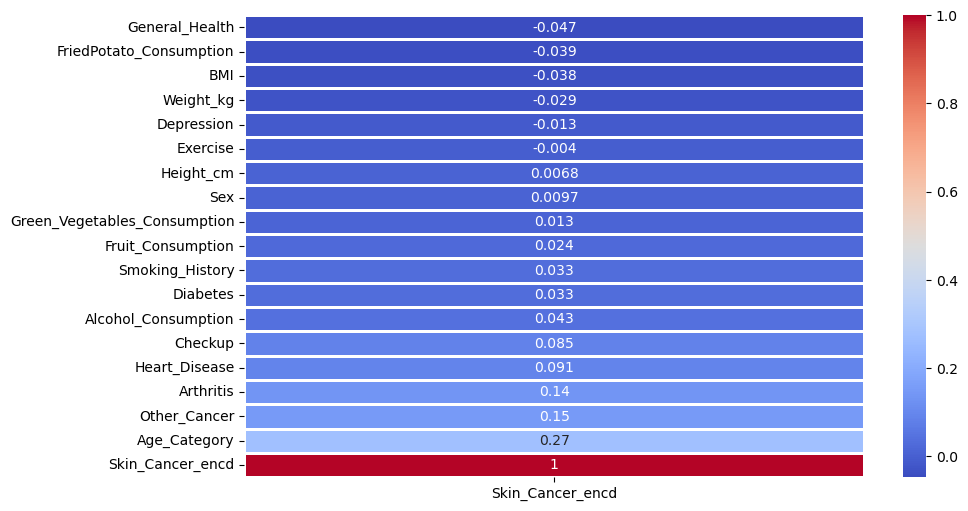

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy2.corr()[['Skin_Cancer_encd']].sort_values(by='Skin_Cancer_encd'), linewidths=1, annot=True,cmap='coolwarm');

In [97]:
y = df_copy2[['Skin_Cancer_encd']]
X = df_copy2.drop(columns=['Skin_Cancer_encd'], axis =1)
                          

In [98]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Instantiate the models

lr_mod = LogisticRegression()

In [100]:
lr_mod.fit(X_train, y_train)

LogisticRegression()

### Creating function for feature importance

In [101]:

def feature_selection_with_rfe(model, X_train, y_train, n_features_to_select=6):
    
    # Initialize RFE with the model and desired number of features
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    
    # Fit RFE to the training data
    fit = rfe.fit(X_train, y_train)
    
    # Extract the selected feature names
    selected_features = X_train.columns[fit.support_]
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Num Features: {fit.n_features_}")
    print(f"Selected Features: {selected_features.tolist()}")


##### display important features

In [102]:
feature_selection_with_rfe(lr_mod, X_train, y_train, n_features_to_select=8)

Model: LogisticRegression
Num Features: 8
Selected Features: ['Checkup', 'Exercise', 'Heart_Disease', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category']


#### Feature selection ( dropping features with less significance)

In [103]:
y = df_copy2[['Skin_Cancer_encd']]

X = df_copy2.drop(columns=['Skin_Cancer_encd', 'General_Health', 'Sex','Height_cm', 'Weight_kg', 
                           'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 
                           'Green_Vegetables_Consumption','FriedPotato_Consumption' ], axis =1)
                          

#### Retrain the model with the selected features

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
lr_mod.fit(X_train, y_train)

LogisticRegression()

In [106]:
pred_lr = lr_mod.predict(X_test)

### Comparing Actual Vs Predicted

In [107]:
def comparison_df(actual, predicted):
    
    # to Ensure predicted values are 1D
    if predicted.ndim > 1:
        predicted = predicted.ravel()
    
    # Ensure actual values are 1D
    if actual.ndim > 1:
        actual = actual.values.ravel()
    
    # Create the comparison DataFrame
    comparison_df = pd.DataFrame({
        'Actual': actual,
        'Predicted': predicted
    })
    
     # Calculate the percentage of correct predictions
    correct_predictions = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
    total_predictions = len(comparison_df)
    accuracy_percentage = (correct_predictions / total_predictions) * 100
    
    
    # Display the accuracy percentage
    print(f"Percentage of correct predictions: {accuracy_percentage:.2f}%")
    
    
    return comparison_df


In [108]:
comparison_df(y_test, pred_lr).head(5)

Percentage of correct predictions: 90.18%


Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0

In [109]:
print("Logistic Regression: \n", classification_report(y_test,pred_lr))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     55689
           1       0.60      0.00      0.00      6066

    accuracy                           0.90     61755
   macro avg       0.75      0.50      0.47     61755
weighted avg       0.87      0.90      0.86     61755



###### The model appears to be more precise in predicting "0" group which is as a result of this group (No Cancer) making  82.9% of the entire

###### distribution. Hence the data is Imbalanced.

### Handling Imbalance Data with ADASYN

In [110]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [111]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [112]:
lr_mod_adasyn = LogisticRegression()

In [113]:
lr_mod_adasyn.fit(Xs_train, ys_train)

LogisticRegression()

In [114]:
pred_lr_adasyn = lr_mod_adasyn.predict(Xs_test)

In [115]:
lr_adasyn_score = lr_mod_adasyn.score(Xs_test, ys_test)

In [116]:
print(f"model Accuracy score for Logistic Regression is: {lr_adasyn_score}")

model Accuracy score for Logistic Regression is: 0.692896214258036


In [117]:
print("Logistic Regression: \n", classification_report(ys_test,pred_lr_adasyn))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68     55686
           1       0.68      0.74      0.70     55283

    accuracy                           0.69    110969
   macro avg       0.69      0.69      0.69    110969
weighted avg       0.69      0.69      0.69    110969



In [118]:
save_path = r"C:\Users\HP\Ten_Alytics_Python_project\Skin Cancer App\Cleaned_dataset.csv"


# Save the DataFrame to a CSV file
data.to_csv(save_path, index=False)

print(f'Data has been saved to {save_path}')

Data has been saved to C:\Users\HP\Ten_Alytics_Python_project\Skin Cancer App\Cleaned_dataset.csv


### SAVING THE MODEL

In [120]:
import pickle

In [121]:
data = {'model': lr_mod_adasyn}
with open ('lr_mod_ada_skinca_.pkl', 'wb') as file:
    pickle.dump(data, file)

#### Loading the model

In [122]:
with open ('lr_mod_ada_skinca_.pkl', 'rb') as file:
    data = pickle.load(file)

### Model testing

In [128]:
user_input = {'Checkup': 'Within the past year', 'Exercise': 'No', 'Heart_Disease': 'Yes', 'Other_Cancer': 
              'No',
             'Depression': 'No', 'Diabetes': 'Yes', 'Arthritis': 'No', 'Age_Category': '75-79'}

user_df = pd.DataFrame([user_input])

In [129]:
size_map = { '18-24': 0, '25-29': 1, '30-34': 2,
            '35-39': 3, '40-44':4, '45-49': 5, '50-54': 6, '55-59':7, '60-64': 8, '65-69': 9,
           '70-74': 10, '75-79': 11, '80+': 12}

user_df['Age_Category'] = user_df['Age_Category'].map(size_map )

In [130]:
size_map = { 'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2,
            'Within the past 2 years': 3, 'Within the past year':4 }

user_df['Checkup'] = user_df['Checkup'].map(size_map )

In [131]:
cat_cols = user_df.select_dtypes(include=['object']).columns

user_df[cat_cols] = user_df[cat_cols].apply(lambda x: x.replace({'Yes': 1, 'No': 0}))

In [132]:
lr_mod_adasyn.fit(Xs_train, ys_train)

LogisticRegression()

In [133]:
# Make predictions and obtain probabilities
Skin_Cancer_proba = lr_mod_adasyn.predict_proba(user_df)[:, 1]  

# Make a decision based on a threshold 
threshold = 0.5
Skin_cancer = 1 if Skin_Cancer_proba > threshold else 0

# Output results
if Skin_cancer == 1:
    print(f'This patient is diagonised with Skin cancer with a Probability of {Skin_Cancer_proba[0]*100:.2f}%')
else:
    print(f'This patient does not have Skin cancer with a Probability of {(1 - Skin_Cancer_proba[0])*100:.2f}% ')

This patient is diagonised with Skin cancer with a Probability of 64.04%
